using kaggle legacy API key for data import

In [1]:
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


open kaggle hub and select CODE to get this

In [3]:
digit_recognizer = kagglehub.competition_download('digit-recognizer')
print("pikachu")

100%|██████████| 15.3M/15.3M [00:01<00:00, 13.6MB/s]

Extracting files...


pikachu


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_csv(os.path.join(digit_recognizer,'train.csv'))

In [5]:
# !unzip digit-recognizer.zip

In [6]:
# import pandas as pd
# df = pd.read_csv('/content/train.csv')

In [7]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40017,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(42000, 785)

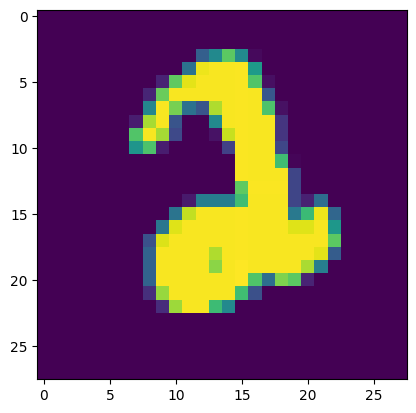

In [10]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[8527,1:].values.reshape(28,28))

In [11]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [13]:
X_train.shape

(33600, 784)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)


19.542928457260132


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)

In [20]:
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [21]:
X_train_trf.shape

(33600, 200)

In [22]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [23]:
y_pred = knn.predict(X_test_trf)

In [24]:
accuracy_score(y_test,y_pred)

0.9507142857142857

In [25]:
#  accuracy_score(y_test,y_pred)

In [26]:

# for i in range(1,785):
#   pca = PCA(n_components =i)
#   X_train_trf = pca.fit_transform(X_train_scaled)
#   X_test_trf = pca.transform(X_test_scaled)
#   knn.fit(X_train_trf,y_train)
#   y_pred = knn.predict(X_test_trf)
#   maxi = 0
#   for i in range(1,10):
#     if accuracy_score(y_test,y_pred)>maxi:
#       maxi = accuracy_score(y_test,y_pred)
#       print(maxi)
#       print(i)




In [27]:
# transforming to a 2D coordinate syste,
pca = PCA(n_components = 2)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)


In [28]:
X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

In [29]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],y=X_train_trf[:,1],color=y_train_trf,color_discrete_sequence=px.colors.qualitative.G10)
fig.show()


In [30]:
# transforming in 3d
pca  = PCA(n_components = 3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [31]:
X_train_trf

array([[-226.60523462, -305.89437099, -417.17563833],
       [  38.33583717,  461.09152047, -100.40840682],
       [-305.49225463,  351.67141678,  961.3475787 ],
       ...,
       [ -28.00133402, -596.06287179, -606.25130926],
       [ 233.97011308,  -18.64779077,  148.27481803],
       [1096.50373629,  254.72333173,  560.33354832]])

In [32]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x = X_train_trf[:,0], y =X_train_trf[:,1], z = X_train_trf[:,2],
                    color = y_train_trf)
fig.update_layout(
    margin = dict(l=28,r=20,b=20,t=20),
    paper_bgcolor = 'LightSteelBlue',
    plot_bgcolor = 'rgb(0,0,0)'
)
fig.show()

In [33]:
pca.explained_variance_
# eigen_values

array([335506.57620544, 244807.10511442, 212051.0345165 ])

In [34]:
pca.components_.shape
# eigen_vectors


(3, 784)

In [35]:
pca.explained_variance_ratio_

array([0.09770722, 0.07129345, 0.06175413])

In [36]:
pca = PCA(n_components =None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
# so actually mr tablib shows = instead of ==

In [37]:
pca.explained_variance_.shape

(784,)

In [38]:
pca.components_.shape

(784, 784)

In [39]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09770722, 0.16900067, 0.2307548 , 0.28465032, 0.33357585,
       0.37694429, 0.40971003, 0.43863706, 0.46634409, 0.4896358 ,
       0.51056687, 0.53103851, 0.54811645, 0.56494851, 0.58079573,
       0.59567555, 0.60890653, 0.6217459 , 0.63357974, 0.6450916 ,
       0.65585129, 0.66609344, 0.6757597 , 0.68493267, 0.69377981,
       0.70211509, 0.7102658 , 0.71801912, 0.72543898, 0.73237223,
       0.73898072, 0.74531281, 0.75134494, 0.75723224, 0.76285054,
       0.76824915, 0.77332825, 0.77819952, 0.78291205, 0.78755761,
       0.79208251, 0.7965231 , 0.80068828, 0.80464464, 0.80848068,
       0.81221196, 0.815819  , 0.81930765, 0.82264965, 0.82582976,
       0.82897181, 0.83204415, 0.83496782, 0.83783336, 0.84062454,
       0.84331783, 0.84596712, 0.84853351, 0.85106204, 0.85351457,
       0.85592008, 0.85831105, 0.86057999, 0.86279635, 0.8649424 ,
       0.86700054, 0.86901774, 0.87098082, 0.87291702, 0.87479944,
       0.87665559, 0.87847316, 0.88022525, 0.88195105, 0.88360

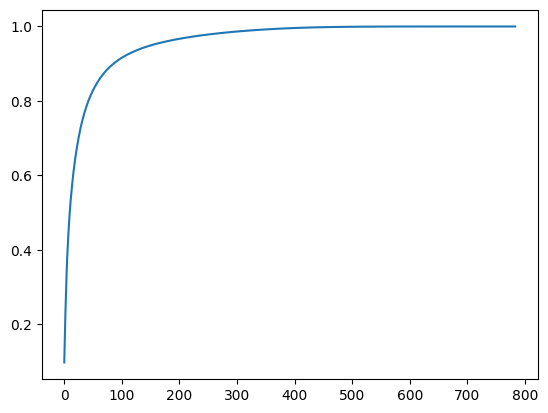

In [40]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [41]:
#iterate through 200-300 for accuracy score for each pca(columns like 201,202,203,204....)